# Лабораторная №1. Проверка статистических гипотез

> Вариант № ??

**Распределения**:

$X_1$ ~ ?? (объём выборки $n_1$ = ??)

$X_2$ ~ ?? (объём выборки $n_2$ = ??)

---


*Импорт необходимых библиотек:*

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок

`x = np.random.<`*`distribution`*`>(`*`...params`*`, `*`size`*`)`, где

- *distribution* - распределение;
- *...params* - параметры распределения;
- *size* - размер выборки

Доступные распределения:

- нормальное: normal(m, $\sigma^2$)
- равномерное: uniform(a, b)
- хи-квадрат: chisquare(k)


In [2]:
# Размеры выборок
n1 = 100
n2 = 100

# Функции для получения выборок
def gen_x1():
    return np.random.chisquare(3, n1)

def gen_x2():
    return np.random.normal(0, 2, n2)

# Конкретные выборки
x1, x2 = gen_x1(), gen_x2()

## 1. Выборочные характеристики

**Необходимо**:

1. Описать распределения $X_1$ и $X_2$, найти их МО и дисперсию, указать объём выборок

2. Рассчитать выборочные характеристики: среднее, $s$, $s^2$

3. Рассчитать выборочные характеристики для совокупной выборки $x_1$ + $x_2$


In [3]:
# пример вызова функций
def print_sample_chars(sample):
    print("Среднее {}, s={}, s^2={}".format(
        np.mean(sample),
        np.std(sample),
        np.var(sample)
    ))

print_sample_chars(x1)
print_sample_chars(x2)
pooled = np.concatenate([x1, x2])
print_sample_chars(pooled)

Среднее 2.7689748198914224, s=1.9964443124687896, s^2=3.985789892788978
Среднее -0.2528677630051481, s=1.8146384401410254, s^2=3.2929126684374537
Среднее 1.2580535284431373, s=2.4335641412473534, s^2=5.92223442956497


**Указания**:

- `np.mean` - среднее значение
- `np.std` - $s$ - оценка с.к.о.
- `np.var` - $s^2$ - оценка дисперсии

## 2. Однопараметрические критерии

**Необходимо**:

Для СВ $X_1$ сформулировать гипотезы $H_0$, проверяемые следующими тестами:

1. z-test
2. t-test
3. $\chi^2-test$ ($m$ известно)
4. $\chi^2-test$ ($m$ неизвестно)

Для каждой гипотезы рассчитать выборочное значение статистики критерия, p-value, выбрать уровень значимости $\alpha$ и рассчитать ошибку статистического решения.

**Указания**:

Для получения свойств стандартных распределений используем модуль `stats`:

- для нормального распределения `stats.norm`;
- для Стьюдента `stats.t`;
- для хи-квадрат `stats.chi2`.

Квантиль распределения: `stats.<distribution>.ppf(<уровень значимости>, ...<параметры распределения>)`

Функция распределения: F(x) = `stats.<distribution>.cdf(x, ...<параметры распределения>)`

Функция плотности вероятности: f(x) = `stats.<distribution>.pdf(x, ...<параметры распределения>)`

Проверим гипотезу $H_0: X_2 \sim N(m_0 = 0.2, \sigma^2)$ на уровне значимости $\alpha = .05$ при альтернативной двусторонней гипотезе ($\sigma$ считаем неизвестным):

In [4]:
def criterion_z_test(sample):
    m0 = 1
    sigma = 2
    mean = np.mean(sample)
    n = len(sample)
    return (mean - m0) / sigma * np.sqrt(n)

def criterion_chi2_m(sample):
    pass

def criterion_chi2_no_m(sample):
    pass

def criterion_t_test(sample):
    s = np.std(sample) # s - оценка с.к.о.
    mean = np.mean(sample) # выборочное среднее
    m0 = 0.2 # основная гипотеза: МО генеральной совокупности для x2 составляет m0
    return (mean - m0) / s * np.sqrt(len(sample))

z_test_dist = stats.norm
t_test_dist = stats.t
chi2_test_dist = stats.chi2
chi2_test_f_dist = stats.f

# t-test
criterion_value = criterion_t_test(x2) # значение статистики критерия для гипотезы H0: m = m0, сигма неизвестна

alpha = 0.05 # задаёмся уровнем значимости
student_quantile = t_test_dist.ppf(1 - alpha / 2, n2 - 1) # рассчитываем квантиль распределения Стьюдента

critical_value = student_quantile # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение: {}".format(abs(criterion_value), critical_value))

is_h0_true = abs(criterion_value) < critical_value

print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")

Значение критерия: 2.4956363371755383, критическое значение: 1.9842169515086827
Гипотеза H0 отклоняется


### P-value

Рассчёт p-value для право-, лево- и двусторонней альтернативных гипотез:

In [5]:
# статистика критерия в предыдущем примере распределена как T(n2 - 1)
def left_p_value(dist, criterion_value, sample_size):
    return dist.cdf(criterion_value, sample_size - 1)

def right_p_value(dist, criterion_value, sample_size):
    return 1 - dist.cdf(criterion_value, sample_size - 1)

def two_sided_p_value(dist, criterion_value, sample_size):
    left_p = left_p_value(dist, criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format( two_sided_p_value(t_test_dist, criterion_value, n2) ))

Двустороннее p-value: 0.014226128106244629


## 3. Критерии для двух выборок

**Необходимо**:

Выполнить задания пункта 2 для СВ $X_1$ и $X_2$ и следующих тестов:

1. 2-sample t-test
2. 2-sample F-test (m известно)
3. 2-sample F-test (m неизвестно)

In [6]:
def criterion_t2_test(sample1, sample2):
    s1 = np.std(sample1)
    s2 = np.std(sample2)
    n1 = len(sample1)
    n2 = len(sample2)
    S = (n1 - 1) * s1 * s1 + (n2 - 1) * s2 * s2
    S /= n1 + n2 - 2
    
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    z = (m1 - m2) / S
    z /= np.sqrt(1.0 / n1 + 1.0 / n2)
    return z

def criterion_f_test_m(sample1, sample2):
    pass

def criterion_f_test_no_m(sample1, sample2):
    pass

## 4. Выборочные характеристики для Z и P-value

**Необходимо**: Вычислить для выборки мощностью $N$ выборочные значения для случайных величин p-value и значения статистики критерия. Гипотеза $H_0$ задаётся вариантом лабораторной работы.

In [7]:
N = 500

criteria = []
p_values = []

criterion_dist = t_test_dist

for i in range(0, N):
    sample = gen_x2()
    
    criterion_value = criterion_t_test(sample)
    criteria.append(criterion_value)
    
    p_value_left = criterion_dist.cdf(criterion_value, n1 - 1)
    p_value_right = 1 - p_value_left
    p_value_two_sided = 2 * min(p_value_left, p_value_right)
    p_values.append(p_value_two_sided)

print("Критерий:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("среднее = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Критерий:
среднее = -0.9380683524064316, s^2 = 0.9441013484297334, s = 0.9716487783297694
P-value:
среднее = 0.4008053200608297, s^2 = 0.09726181060923988, s = 0.31186825841890337


### Графики

**Графики** теоретических распределений и гистограммы эспериментальных значений для статистики критерия и p-value:

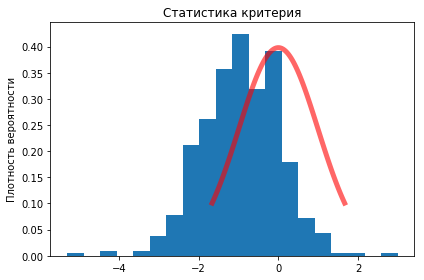

In [8]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 20, normed=True)

# plot
x = np.linspace(criterion_dist.ppf(0.05, n2 - 1), criterion_dist.ppf(0.95, n2 - 1), 100)
ax.plot(x, criterion_dist.pdf(x, n2 - 1), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Статистика критерия")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()

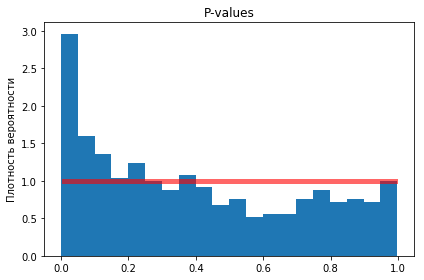

In [9]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 20, normed=True)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("P-values")
ax.set_ylabel("Плотность вероятности")

fig.tight_layout()
plt.show()